In [205]:
import networkx as nx
import raphtoryclient 
from pymotif import Motif
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import scipy


In [206]:
def getMeMyFile():
    search_dir = "/tmp/raphtory/"
    os.chdir(search_dir)
    files = os.listdir(search_dir)
    files = [os.path.join(search_dir, f) for f in files] # add path to each file
    files.sort(key=lambda x: os.path.getmtime(x), reverse=True)
    filename = files[0]+"/partition-0.csv"
    return filename

In [207]:
df= pd.read_csv('/private/tmp/raphtory/TemporalNodeList_473865722992445864/partition-0.csv', header=None, names=['ID', 'ts_y', 'ts','bots'])
df = df[df.bots != 'None']
df

,ID,ts_y,ts,bots
1647165085,(20447545,1643984190),1643984190,human
1647165085,(20447545,1643903487),1643903487,human
1647165085,(20447545,1643898046),1643898046,human
1647165085,(20447545,1645040648),1645040648,human
1647165085,(20447545,1643824562),1643824562,human
...,...,...,...,...
1647165085,(34864619,1647149941),1647149941,human
1647165085,(11272022,1647153657),1647153657,human
1647165085,(11272022,1647153748),1647153748,human
1647165085,(11272022,1647153762),1647153762,human


In [208]:
#matplotlib.pyplot.hist(df)
#plt.show()

In [209]:
newdf = df['ID'].value_counts().to_frame()
newdf = newdf.reset_index(level=0)
newdf

,index,ID
0,(221913049,137
1,(112880396,131
2,(12263542,130
3,(167017165,130
4,(419848022,127
...,...,...
65452,(19505601,1
65453,(14365001,1
65454,(699154655364915200,1
65455,(335393590,1


In [210]:
df['Occurence'] = df['ID'].map(df['ID'].value_counts())
df.sort_values(by ='Occurence',ascending = False, inplace= True)
#df = df[df.Occurence != 40]
df

,ID,ts_y,ts,bots,Occurence
1647165085,(221913049,1647147784),1647147784,human,137
1647165085,(221913049,1646839643),1646839643,human,137
1647165085,(221913049,1647152722),1647152722,human,137
1647165085,(221913049,1647160402),1647160402,human,137
1647165085,(221913049,1647152979),1647152979,human,137
...,...,...,...,...,...
1647165085,(17797666,1647134530),1647134530,human,1
1647165085,(521448718,1647036105),1647036105,human,1
1647165085,(19968812,1647084609),1647084609,human,1
1647165085,(15650584,1647114481),1647114481,human,1


In [211]:
hum = df[df.bots=='human']
hum

,ID,ts_y,ts,bots,Occurence
1647165085,(221913049,1647147784),1647147784,human,137
1647165085,(221913049,1646839643),1646839643,human,137
1647165085,(221913049,1647152722),1647152722,human,137
1647165085,(221913049,1647160402),1647160402,human,137
1647165085,(221913049,1647152979),1647152979,human,137
...,...,...,...,...,...
1647165085,(17797666,1647134530),1647134530,human,1
1647165085,(521448718,1647036105),1647036105,human,1
1647165085,(19968812,1647084609),1647084609,human,1
1647165085,(15650584,1647114481),1647114481,human,1


In [212]:
bo = df[df.bots=='bot']

bo

,ID,ts_y,ts,bots,Occurence
1647165085,(167017165,1647122838),1647122838,bot,130
1647165085,(167017165,1647161241),1647161241,bot,130
1647165085,(167017165,1647122846),1647122846,bot,130
1647165085,(167017165,1647125662),1647125662,bot,130
1647165085,(167017165,1647161247),1647161247,bot,130
...,...,...,...,...,...
1647165085,(1082719195589156866,1641410044),1641410044,bot,1
1647165085,(415765530,1647159762),1647159762,bot,1
1647165085,(1294950664687063041,1644280569),1644280569,bot,1
1647165085,(6666892,1647156666),1647156666,bot,1


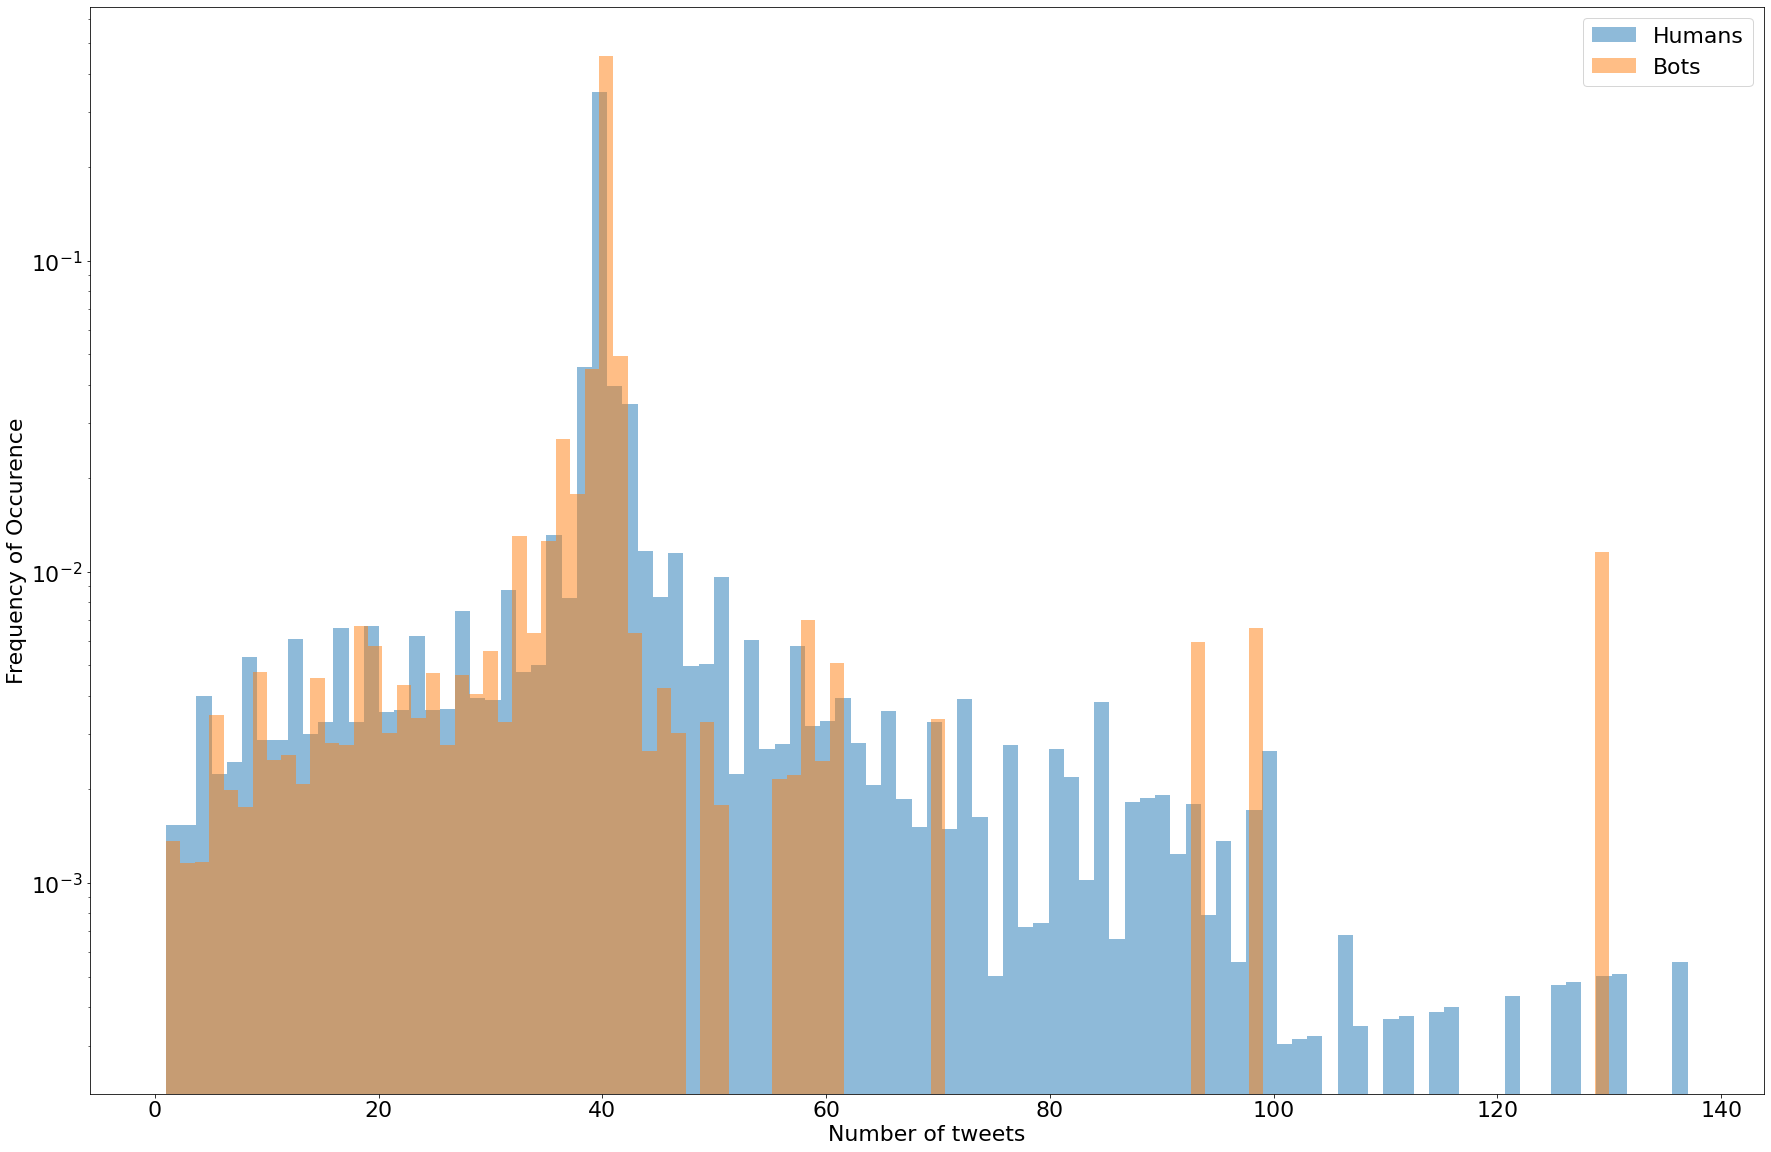

In [213]:
plt.figure(figsize=[30,20])
plt.rcParams.update({'font.size': 22})

matplotlib.pyplot.hist(hum['Occurence'], weights=hum['Occurence'] / len(hum.columns),density=True,alpha = 0.5,bins=100,log=True)
matplotlib.pyplot.hist(bo['Occurence'],weights=bo['Occurence'] / len(bo.columns),density=True, alpha = 0.5,bins=100,log=True)
plt.legend(["Humans","Bots"])
plt.xlabel("Number of tweets")
plt.ylabel("Frequency of Occurence")

plt.savefig('Number of Tweets per User.pdf', bbox_inches='tight')

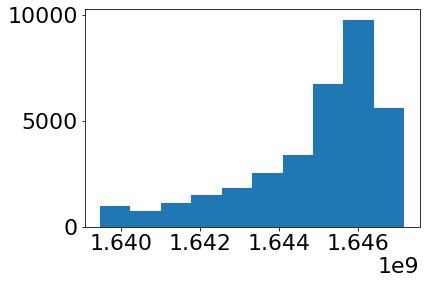

In [214]:
plt.hist(bo['ts'])
plt.show()

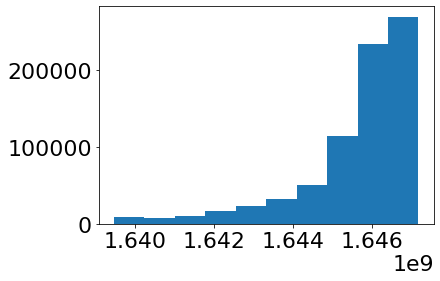

In [215]:
plt.hist(hum['ts'])
plt.show()

In [216]:
df

,ID,ts_y,ts,bots,Occurence
1647165085,(221913049,1647147784),1647147784,human,137
1647165085,(221913049,1646839643),1646839643,human,137
1647165085,(221913049,1647152722),1647152722,human,137
1647165085,(221913049,1647160402),1647160402,human,137
1647165085,(221913049,1647152979),1647152979,human,137
...,...,...,...,...,...
1647165085,(17797666,1647134530),1647134530,human,1
1647165085,(521448718,1647036105),1647036105,human,1
1647165085,(19968812,1647084609),1647084609,human,1
1647165085,(15650584,1647114481),1647114481,human,1


In [217]:
bo2=bo.sort_values(['ID','ts'],ascending=False).groupby('ID').head(10)
bo2['diff'] = bo2['ts'] - bo2['ts'].shift(-1)
bo2 = bo2[bo2['diff'] >= 0]

bo2

,ID,ts_y,ts,bots,Occurence,diff
1647165085,(999996175070711808,1647133325),1647133325,bot,5,7431.0
1647165085,(999996175070711808,1647125894),1647125894,bot,5,3849.0
1647165085,(999996175070711808,1647122045),1647122045,bot,5,3659.0
1647165085,(999996175070711808,1647118386),1647118386,bot,5,6719.0
1647165085,(998825510552723456,1647156711),1647156711,bot,1,427.0
...,...,...,...,...,...,...
1647165085,(1003718268484489216,1645892312),1645892312,bot,35,2.0
1647165085,(1003718268484489216,1645892310),1645892310,bot,35,1.0
1647165085,(1003718268484489216,1645892309),1645892309,bot,35,76367.0
1647165085,(1003718268484489216,1645815942),1645815942,bot,35,1.0


In [218]:
hum2=hum.sort_values(['ID','ts'],ascending=False).groupby('ID').head(10)
hum2['diff'] = hum2['ts'] - hum2['ts'].shift(-1)
hum2 = hum2[hum2['diff'] >= 0]

hum2

,ID,ts_y,ts,bots,Occurence,diff
1647165085,(999953976199131136,1647149020),1647149020,human,6,31410.0
1647165085,(999953976199131136,1647117610),1647117610,human,6,2923.0
1647165085,(999953976199131136,1647114687),1647114687,human,6,45.0
1647165085,(999953976199131136,1647114642),1647114642,human,6,3789.0
1647165085,(999953976199131136,1647110853),1647110853,human,6,1775.0
...,...,...,...,...,...,...
1647165085,(1000031187824463872,1645913651),1645913651,human,40,270.0
1647165085,(1000031187824463872,1645913381),1645913381,human,40,256.0
1647165085,(1000031187824463872,1645913125),1645913125,human,40,45757.0
1647165085,(1000031187824463872,1645867368),1645867368,human,40,177413.0


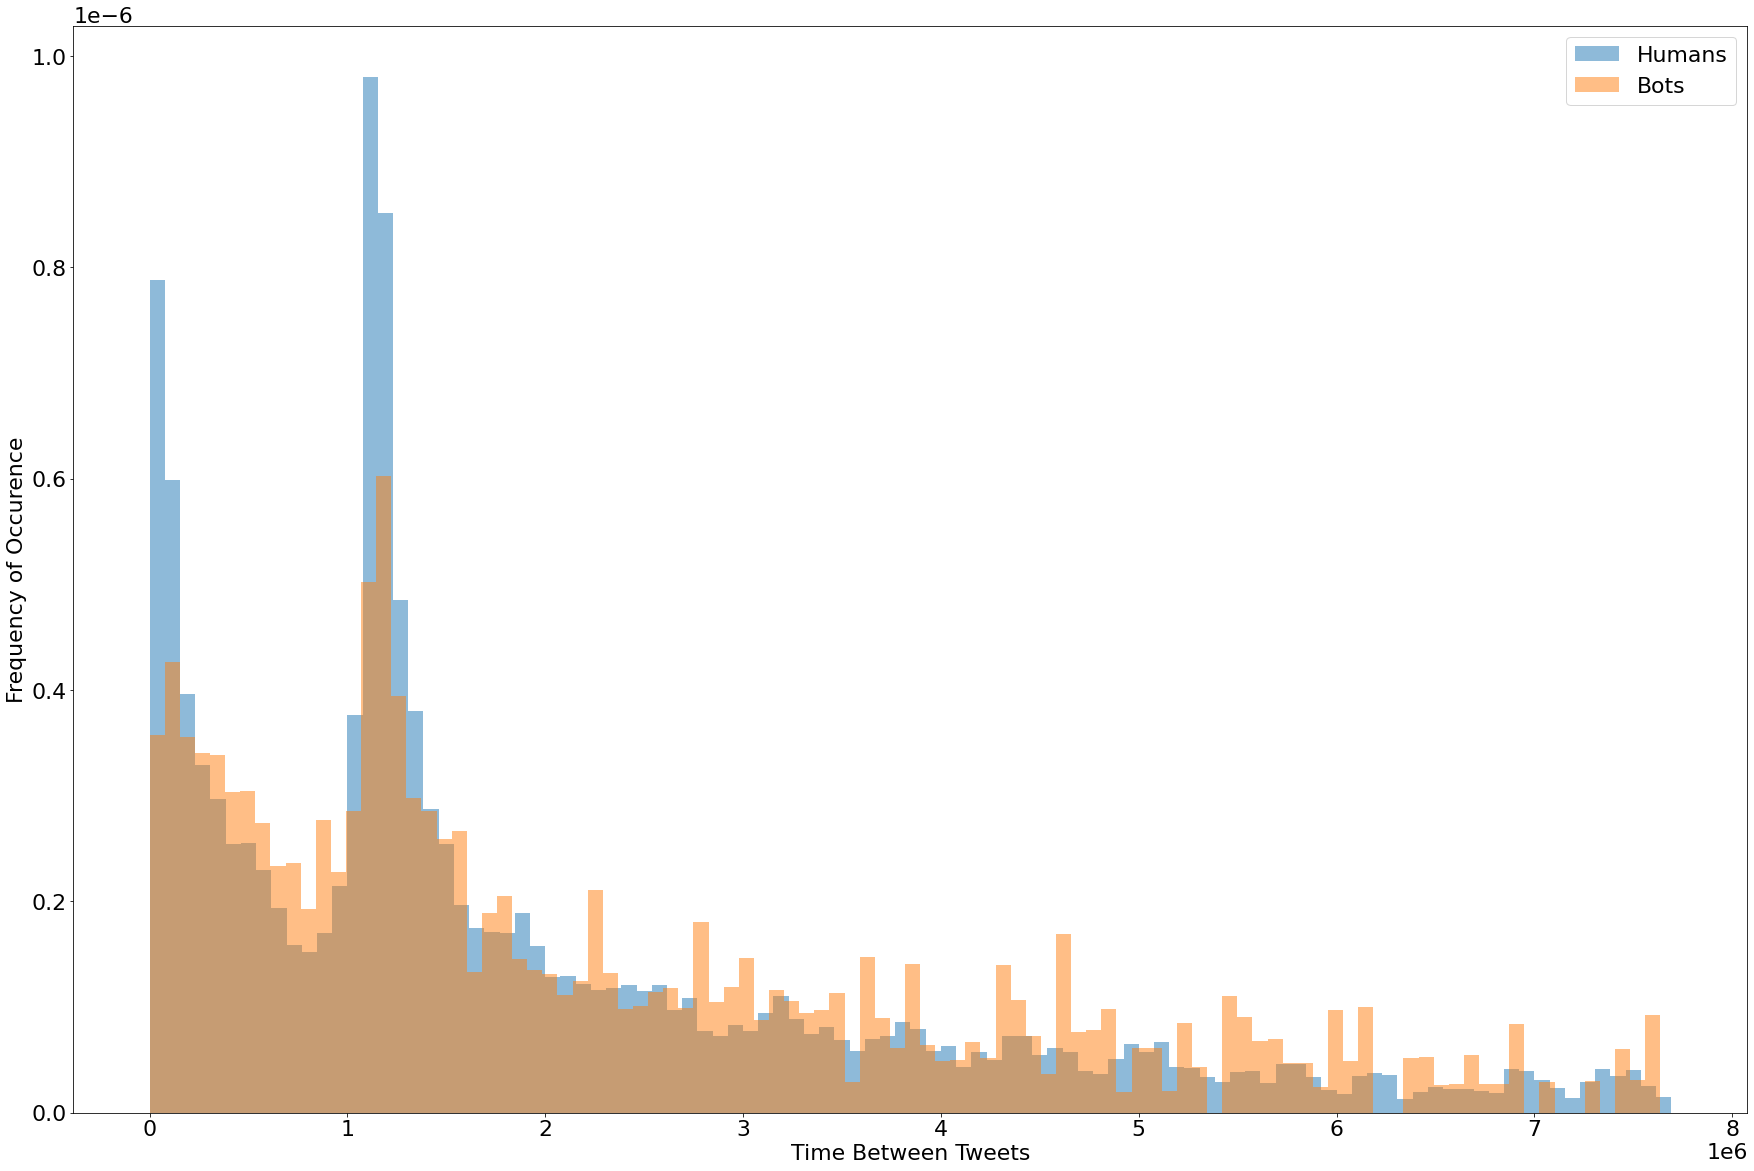

In [219]:
plt.figure(figsize=[30,20])

plt.rcParams.update({'font.size': 22})

matplotlib.pyplot.hist(hum2['diff'], weights=hum2['diff'] / len(hum2.columns),density=True,alpha = 0.5,bins=100)
matplotlib.pyplot.hist(bo2['diff'], weights=bo2['diff'] / len(bo2.columns),density=True,alpha = 0.5,bins=100)
plt.ylabel("Frequency of Occurence")
plt.xlabel("Time Between Tweets")
plt.legend(["Humans","Bots"])

plt.savefig('Time between Tweets.pdf',bbox_inches='tight')

In [220]:
##out of total number of tweet percentage bot at given time